In [48]:
import muspy

# Iterate over Dataset

In [57]:
import os


muspy_objs = {}

for i, os_walk_tuple in enumerate(os.walk('../../data/midi_files/')):
    files_list = os_walk_tuple[2]
    
    for filename in files_list:
        directory = os_walk_tuple[0]

        if filename[-3:] == 'mid':
            muspy_objs[filename] = muspy.read_midi(os.path.join(directory, filename))

In [58]:
class YamanDataset(muspy.Dataset):
    def __init__(self, muspy_objs):
        self.muspy_objs = muspy_objs
        self._keys = list(self.muspy_objs.keys())

    def __getitem__(self, idx):
        return self.muspy_objs[self._keys[idx]]

    def __len__(self):
        return len(self.muspy_objs)

yaman_dataset = YamanDataset(muspy_objs)

In [59]:
test_music = muspy_objs['Aeri Aali - Sthaayi 1.1_2.mid']

In [60]:
muspy.to_representation(test_music, kind='piano-roll')

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(760, 128), dtype=uint8)

[<Axes: xlabel='time (beat)', ylabel='\n\npitch'>]

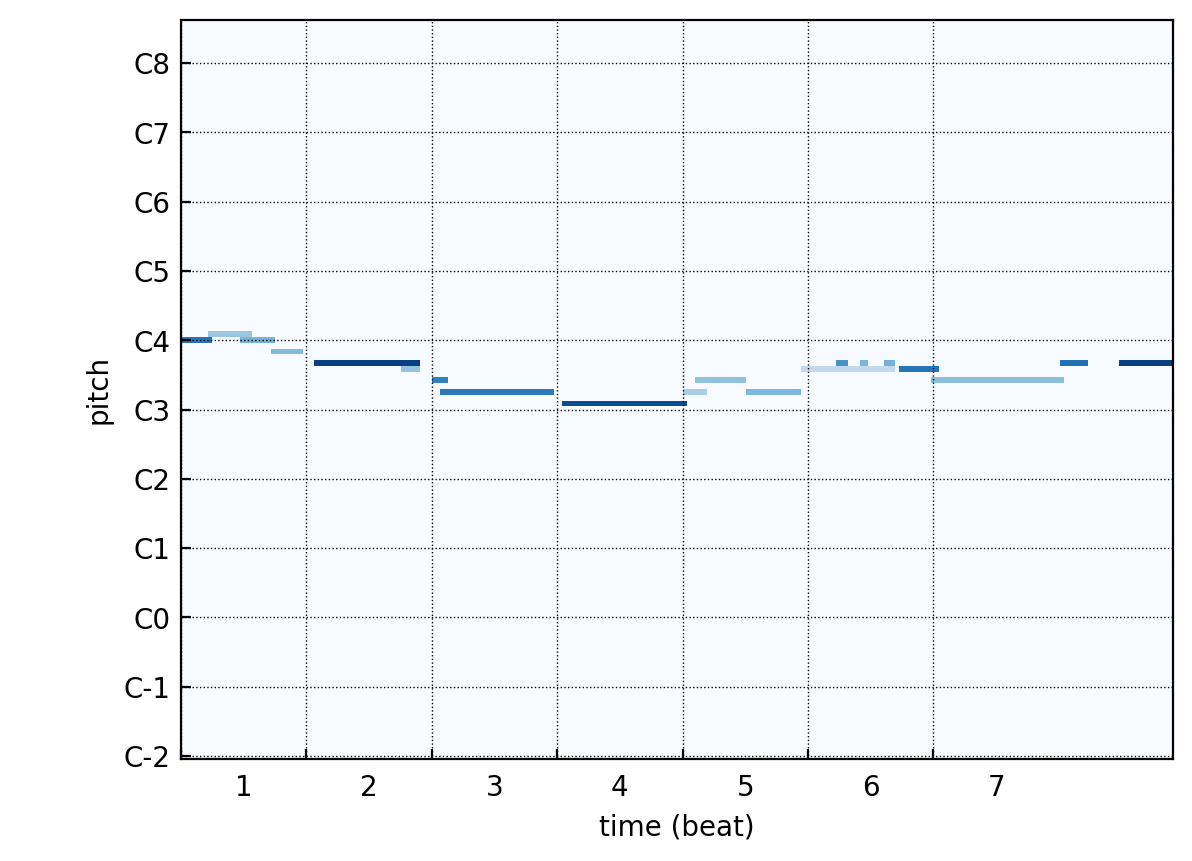

In [31]:
muspy.show_pianoroll(test_music)

In [29]:
test_music.get_end_time()/(test_music.resolution)

7.90625

In [ ]:
yaman_dataset.to_pytorch_dataset(

In [ ]:
from typing import Dict, Union

from torch.utils.data import Dataset, DataLoader


class MIDIFilesDataset(Dataset):
    def __init__(self, midi_files_dict: Dict[str, str]):
        self._midi_files_dict = midi_files_dict
        self._midi_files_dict_keys = list(self._midi_files_dict.keys())

    def __getitem__(self, idx: Union[str, int]):
        if type(idx) is int: 
            if idx > len(self): raise IndexError
            else: return self._midi_files_dict[self._midi_files_dict_keys[idx]]
            
        if type(idx) is str:
            if not idx in self._midi_files_dict: raise IndexError
            else: return self._midi_files_dict[idx]
                
        else: raise IndexError

    def __len__(self):
        return len(self._midi_files_dict)    